In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.style.use('ggplot')

def validate(chunks):
    for chunk in chunks:
        mask = (chunk['Destination'] == "AGP") | (chunk['Destination'] == "MAD") | (chunk['Destination'] == "BCN")
        yield chunk.loc[mask]

chunks = pd.read_csv('searches.csv',
                        sep='\^',
                        engine='python',
                        usecols=['Date', 'Destination'],
                        iterator=True,
                        chunksize=10000,
                        parse_dates=True)
    
df_spain = pd.concat(validate(chunks))
df_spain['Month'] = pd.to_datetime(df_spain.Date).dt.month
count = df_spain.groupby(['Destination', 'Month']).Month.count()

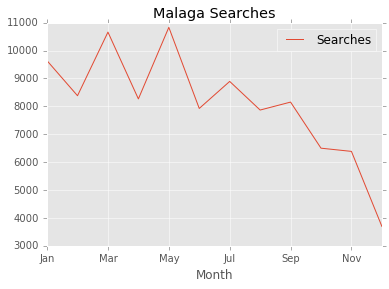

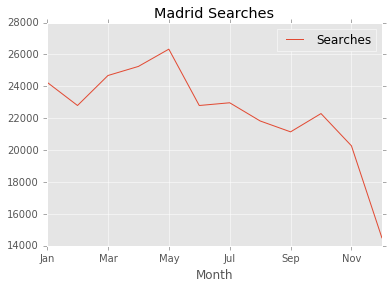

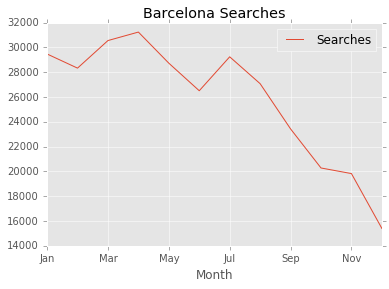

In [142]:
%matplotlib inline
import calendar

df = pd.DataFrame(count)
df.columns = ['Searches']
df = df.reset_index()
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df[df['Destination'] == 'AGP'].plot(title='Malaga Searches', x='Month', y='Searches')
df[df['Destination'] == 'MAD'].plot(title='Madrid Searches', x='Month', y='Searches')
df[df['Destination'] == 'BCN'].plot(title='Barcelona Searches', x='Month', y='Searches')